In [69]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px

# Libs para plotar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *


In [71]:
# Configurando o Plotly para funcionar no Google Colab / Ipython.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

configure_plotly_browser_state()

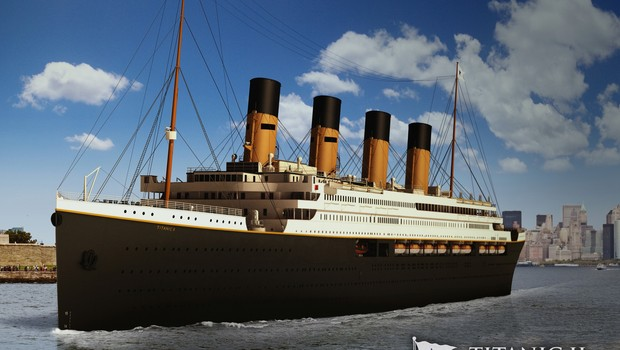

# 🛠️ O que vamos construir? 

**Requisitos do desafio**
* Elabore e responda 4 perguntas sobre o dataset escolhido;
* Realise tratamentos e/ou correções nos dados caso ache necessário;
* Utilize gráficos para se ter melhor compreensão dos resultados;
* Apresente uma conclusão sobre os dados analisados;
* Caso tenha encontrado fatores limitantes durante a análise, descreva os problemas encontrados e quais foram as soluções adotadas.




# 💡 O que vamos responder com os dados?

**Perguntas selecionadas:**


1. Quantas pessoas sobreviveram ao desastre?

2. O Sexo influenciou no fato de sobreviver ou não?

3. Pessoas alocadas em Classes melhores (mais caras) sobreviveram mais?

4. O número de parentes embarcados influênciou na sobrevivência dos passageiros? Vamos descrobrir!

5. Qual foi o perfil dos sobreviventes? (Sexo, Idade, Classe)




# ⚠️ Carregando o Dataset

In [8]:
# Carregando o dataset
dfTitanic = pd.read_parquet(path="https://github.com/conexalabs/desafio-data-analyst/blob/main/data/titanic.parquet?raw=true")

# 👓 Análise exploratória inicial

In [9]:
dfTitanic.head(10)

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0,A/5 21171,7.2500,None,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0,113803,53.1000,C123,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0,373450,8.0500,None,S
5,"Moran, Mr. James",0.0,3,male,NaN,0,0,330877,8.4583,None,Q
6,"McCarthy, Mr. Timothy J",0.0,1,male,54.0,0,0,17463,51.8625,E46,S
7,"Palsson, Master. Gosta Leonard",0.0,3,male,2.0,3,1,349909,21.0750,None,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,3,female,27.0,0,2,347742,11.1333,None,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",1.0,2,female,14.0,1,0,237736,30.0708,None,C


In [10]:
dfTitanic.tail(10)

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1299,"Riordan, Miss. Johanna Hannah""""",NaN,3,female,NaN,0,0,334915,7.7208,None,Q
1300,"Peacock, Miss. Treasteall",NaN,3,female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,None,S
1301,"Naughton, Miss. Hannah",NaN,3,female,NaN,0,0,365237,7.7500,None,Q
1302,"Minahan, Mrs. William Edward (Lillian E Thorpe)",NaN,1,female,37.0,1,0,19928,90.0000,C78,Q
1303,"Henriksson, Miss. Jenny Lovisa",NaN,3,female,28.0,0,0,347086,7.7750,None,S
1304,"Spector, Mr. Woolf",NaN,3,male,NaN,0,0,A.5. 3236,8.0500,None,S
1305,"Oliva y Ocana, Dona. Fermina",NaN,1,female,39.0,0,0,PC 17758,108.9000,C105,C
1306,"Saether, Mr. Simon Sivertsen",NaN,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,None,S
1307,"Ware, Mr. Frederick",NaN,3,male,NaN,0,0,359309,8.0500,None,S
1308,"Peter, Master. Michael J",NaN,3,male,NaN,1,1,2668,22.3583,None,C


In [11]:
dfTitanic.shape

(1309, 11)

In [12]:
dfTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1309 non-null   object 
 1   survival  891 non-null    float64
 2   pclass    1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


## Considerações e problemas encontrados

**Por meio das informações acima podemos fazer as seuintes considerações:**

 1. A coluna Survival deveria apresentar valores inteiros porém observa-se valores decimais (float) assim como a coluna Age. Deve-se converter os valores desta coluna para números inteiros.
 2. A coluna Age apresenta a idade dos passageiros e por isso deveria apresentar valores inteiros e não decimais. Os valores dessa coluna devem ser arredondados e convertidos para inteiro.

3. Existem muitos valores não prenchidos e por isso deve-se assumir um critério para preeenche-los ou optar por remover toda a linha que os contiver.





## Análise estatística básica

In [13]:
dfTitanic.describe()

,survival,pclass,age,sibsp,parch,fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


## Verificando a consistência dos dados (Valores únicos)

In [14]:
dfTitanic.sex.describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [15]:
dfTitanic.sex.unique()

array(['male', 'female'], dtype=object)

In [16]:
dfTitanic.embarked.unique()

array(['S', 'C', 'Q', None], dtype=object)

# 🧽 Limpando os dados

## Removendo os dados em branco

In [17]:
dfTitanic.isnull().sum()

name           0
survival     418
pclass         0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

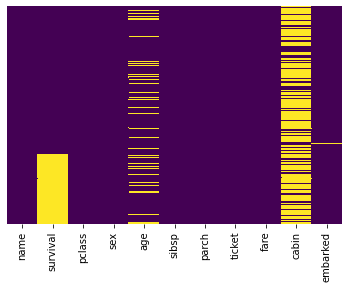

In [18]:
sns.heatmap(dfTitanic.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Como podemos observar a coluna com o maior número de registros em branco é a coluna "cabin" com 1014, seguida por "survival" com 418 e pela coluna "age" com 263 registros.

Dessa forma irei remover a coluna "cabin" pois não irei utilizá-la na minha análise.
Como as colunas "survival" e "age" possuem relativamente poucos registros em branco, removerei a linha inteira que contenha pelo menos um valor em branco.

In [19]:

dfTitanicLimpo = dfTitanic.drop(['cabin'], axis=1)
dfTitanicLimpo.head(15)

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,"Braund, Mr. Owen Harris",0.0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,1,female,38.0,1,0,PC 17599,71.2833,C
2,"Heikkinen, Miss. Laina",1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,1,female,35.0,1,0,113803,53.1000,S
4,"Allen, Mr. William Henry",0.0,3,male,35.0,0,0,373450,8.0500,S
5,"Moran, Mr. James",0.0,3,male,NaN,0,0,330877,8.4583,Q
6,"McCarthy, Mr. Timothy J",0.0,1,male,54.0,0,0,17463,51.8625,S
7,"Palsson, Master. Gosta Leonard",0.0,3,male,2.0,3,1,349909,21.0750,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,3,female,27.0,0,2,347742,11.1333,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",1.0,2,female,14.0,1,0,237736,30.0708,C


In [20]:
dfTitanicLimpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1309 non-null   object 
 1   survival  891 non-null    float64
 2   pclass    1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(4)
memory usage: 102.4+ KB


In [21]:
dfTitanicLimpo.dropna(axis=0, how="any", inplace=True)

In [22]:
dfTitanicLimpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      712 non-null    object 
 1   survival  712 non-null    float64
 2   pclass    712 non-null    int64  
 3   sex       712 non-null    object 
 4   age       712 non-null    float64
 5   sibsp     712 non-null    int64  
 6   parch     712 non-null    int64  
 7   ticket    712 non-null    object 
 8   fare      712 non-null    float64
 9   embarked  712 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 61.2+ KB


In [23]:
dfTitanicLimpo.isnull().sum()

name        0
survival    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

## Resolvendo os problemas mencionados nas considerações

Consideração *1*

In [48]:
dfTitanicLimpo.survival = dfTitanicLimpo.survival.astype(np.int64)

Consideração 2

In [49]:
dfTitanicLimpo.age = dfTitanicLimpo.age.astype(np.int64)

A cosideração 3 já foi resolvida previamente

# 🎯 Mão na massa! Vamos responder as perguntas! 🎯

# 📌 Quantas pessoas sobreviveram ao desastre? 📌

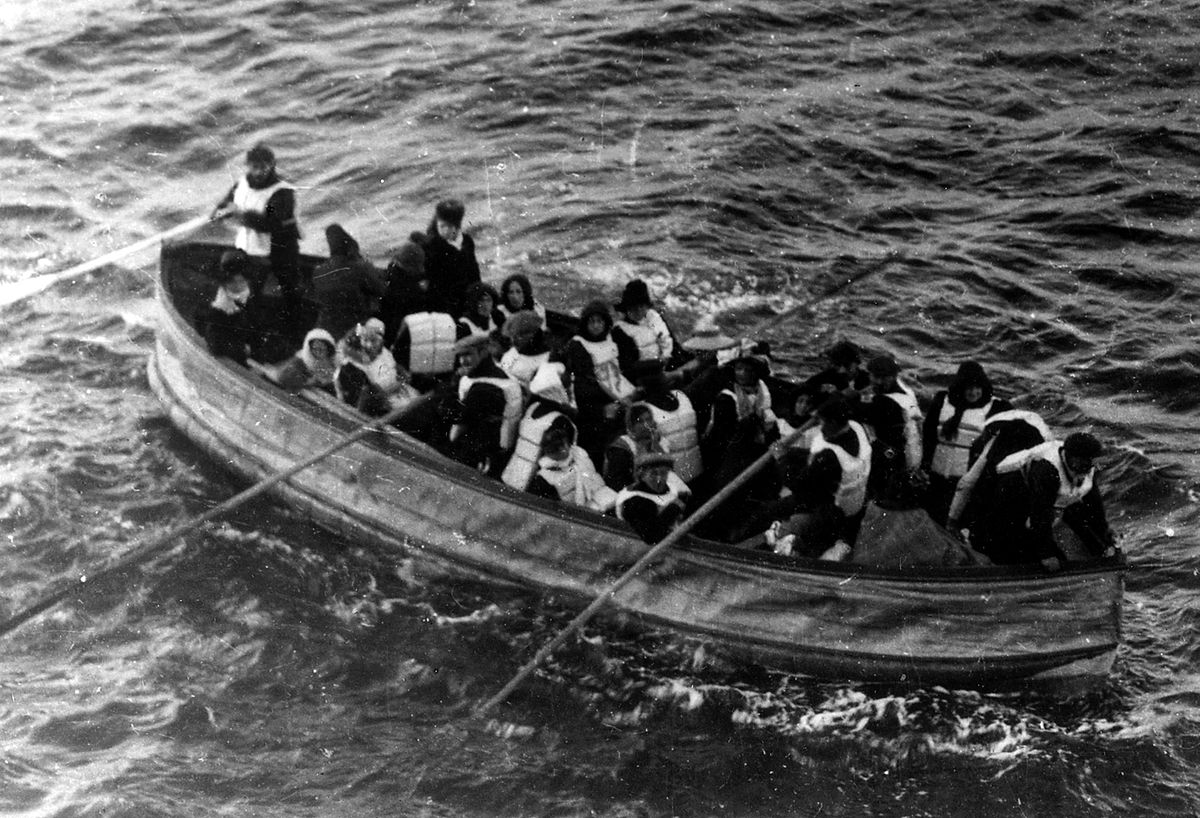

In [26]:
dfTitanicLimpo.survival.sum()

288.0

In [27]:
(dfTitanicLimpo.survival.sum()/ dfTitanicLimpo.survival.count())*100

40.44943820224719

O total de sobreviventes foram 288, compreendendo 40.45 %.

# 📌 O Sexo influenciou no fato de sobreviver ou não? 📌


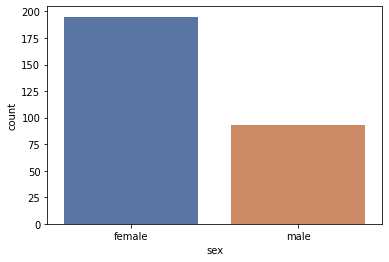

In [28]:
sns.countplot(x="sex", palette="deep", data=dfTitanicLimpo[dfTitanicLimpo['survival'] == 1])

In [29]:
dfTitanicLimpo[dfTitanicLimpo['survival'] == 1].sex.value_counts()

female    195
male       93
Name: sex, dtype: int64

In [30]:
dfTitanicLimpo[(dfTitanicLimpo.sex == "female") & (dfTitanicLimpo.survival == 1)].count()

name        195
survival    195
pclass      195
sex         195
age         195
sibsp       195
parch       195
ticket      195
fare        195
embarked    195
dtype: int64

In [31]:
dfTitanicLimpo[(dfTitanicLimpo.sex == "male") & (dfTitanicLimpo.survival == 1)].count()

name        93
survival    93
pclass      93
sex         93
age         93
sibsp       93
parch       93
ticket      93
fare        93
embarked    93
dtype: int64

Com base no gráfico apresentado, pode inferir que o sexo foi **SIM** um fator determinante para a sobrevivência.

Por meio dos resultados pode-se inferir que 67,7% dos sobreviventes foram do sexo Feminino e apenas 32,3% foram do sexo Masculino.

# 📌 Pessoas alocadas em Classes melhores (mais caras) sobreviveram mais? 📌

Text(0.5, 1.0, 'Sobreviventes categorizados por sexo e por classe')

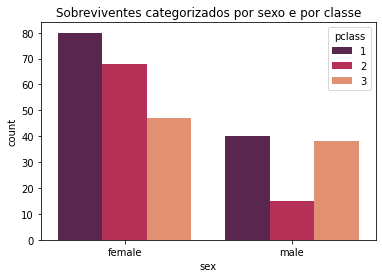

In [32]:
sns.countplot(x="sex", hue="pclass", palette="rocket", data=dfTitanicLimpo[dfTitanicLimpo['survival'] == 1])
plt.title('Sobreviventes categorizados por sexo e por classe')

In [34]:
dfTitanicLimpo.corr(method='pearson')

,survival,pclass,age,sibsp,parch,fare
survival,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
sibsp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


De posse do gráfico de "Sobreviventes categorizados por sexo e por classe" fica ainda mais evidente que o sexo é um fator determinante para a sobrevivência. Quando categorizamos os dados na subcategoria PClasse se torna inegável que passageiros alocados em Classes melhores (mais caras) sobreviveram mais, sobretudo passageiros do sexo feminino.

Com base na matriz de correlação utilizando o método Pearson, é possível observar que existe uma forte correlação (R²=-0.356462) entre sobreviver e estar embarcado em uma classe melhor.

Contudo, podemos observar por meio do gráfico 'Sobreviventes categorizados por sexo e por classe' que no sexo masculino pertencer a uma classe superior não influenciou tanto nas chances de sobrevivência quanto no sexo feminino.

# 📌 O número de parentes embarcados influênciou na sobrevivência dos passageiros? Vamos descrobrir! 📌

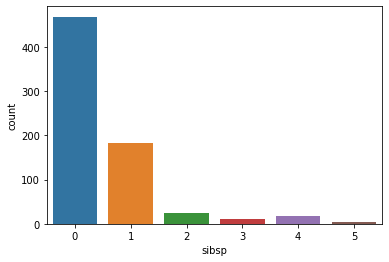

In [36]:
sns.countplot(x="sibsp",data=dfTitanicLimpo)


In [54]:
dfTitanicLimpo[(dfTitanicLimpo['sibsp'] == 0)]

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,embarked
2,"Heikkinen, Miss. Laina",1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
4,"Allen, Mr. William Henry",0,3,male,35,0,0,373450,8.0500,S
6,"McCarthy, Mr. Timothy J",0,1,male,54,0,0,17463,51.8625,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,female,27,0,2,347742,11.1333,S
11,"Bonnell, Miss. Elizabeth",1,1,female,58,0,0,113783,26.5500,S
...,...,...,...,...,...,...,...,...,...,...
885,"Rice, Mrs. William (Margaret Norton)",0,3,female,39,0,5,382652,29.1250,Q
886,"Montvila, Rev. Juozas",0,2,male,27,0,0,211536,13.0000,S
887,"Graham, Miss. Margaret Edith",1,1,female,19,0,0,112053,30.0000,S
889,"Behr, Mr. Karl Howell",1,1,male,26,0,0,111369,30.0000,C


In [55]:
dfTitanicLimpo[(dfTitanicLimpo['sibsp'] == 1)]

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,embarked
0,"Braund, Mr. Owen Harris",0,3,male,22,1,0,A/5 21171,7.2500,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38,1,0,PC 17599,71.2833,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35,1,0,113803,53.1000,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,2,female,14,1,0,237736,30.0708,C
10,"Sandstrom, Miss. Marguerite Rut",1,3,female,4,1,1,PP 9549,16.7000,S
...,...,...,...,...,...,...,...,...,...,...
861,"Giles, Mr. Frederick Edward",0,2,male,21,1,0,28134,11.5000,S
866,"Duran y More, Miss. Asuncion",1,2,female,27,1,0,SC/PARIS 2149,13.8583,C
869,"Johnson, Master. Harold Theodor",1,3,male,4,1,1,347742,11.1333,S
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,female,47,1,1,11751,52.5542,S


Pode-se perceber que a grande maioria dos passageiros (65,87%), embarcou sem nenhum parente. Em segundo lugar com 25,7% estão os passageiros que embarcaram com um parente.

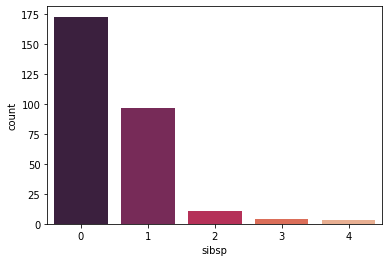

In [37]:
sns.countplot(x="sibsp",palette="rocket", data=dfTitanicLimpo[dfTitanicLimpo['survival'] == 1])

In [51]:
dfTitanicLimpo[(dfTitanicLimpo['survival'] == 1)  & (dfTitanicLimpo['sibsp'] == 0)]

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,embarked
2,"Heikkinen, Miss. Laina",1,3,female,26,0,0,STON/O2. 3101282,7.9250,S
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,female,27,0,2,347742,11.1333,S
11,"Bonnell, Miss. Elizabeth",1,1,female,58,0,0,113783,26.5500,S
15,"Hewlett, Mrs. (Mary D Kingcome)",1,2,female,55,0,0,248706,16.0000,S
21,"Beesley, Mr. Lawrence",1,2,male,34,0,0,248698,13.0000,S
...,...,...,...,...,...,...,...,...,...,...
875,"Najib, Miss. Adele Kiamie ""Jane""",1,3,female,15,0,0,2667,7.2250,C
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",1,1,female,56,0,1,11767,83.1583,C
880,"Shelley, Mrs. William (Imanita Parrish Hall)",1,2,female,25,0,1,230433,26.0000,S
887,"Graham, Miss. Margaret Edith",1,1,female,19,0,0,112053,30.0000,S


In [52]:
dfTitanicLimpo[(dfTitanicLimpo['survival'] == 1)  & (dfTitanicLimpo['sibsp'] == 1)]

,name,survival,pclass,sex,age,sibsp,parch,ticket,fare,embarked
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,female,38,1,0,PC 17599,71.2833,C
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,female,35,1,0,113803,53.1000,S
9,"Nasser, Mrs. Nicholas (Adele Achem)",1,2,female,14,1,0,237736,30.0708,C
10,"Sandstrom, Miss. Marguerite Rut",1,3,female,4,1,1,PP 9549,16.7000,S
25,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,3,female,38,1,5,347077,31.3875,S
...,...,...,...,...,...,...,...,...,...,...
856,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,1,female,45,1,1,36928,164.8667,S
866,"Duran y More, Miss. Asuncion",1,2,female,27,1,0,SC/PARIS 2149,13.8583,C
869,"Johnson, Master. Harold Theodor",1,3,male,4,1,1,347742,11.1333,S
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,female,47,1,1,11751,52.5542,S


O número de parentes embarcados não foi algo determinante na sobrevivência, fato comprovado pelo número de sobreviventes que não possuiam nenhum parente no desastre e mesmo assim sobreviveram.

Isso nos leva a concluir que quanto menor a quantidade de parentes melhor para que o passageiro sobrevivesse. Talvez isso se deve pela preocupação em salvar a todos os parente, consequentemente gastanto o precioso tempo para poder se salvar.

# 📌 Qual foi o perfil dos sobreviventes? (Sexo, Idade, Classe) 📌

In [87]:
# Função para criar BoxPlots
def criarBoxplot(dataframe, eixoX, eixoY):
  configure_plotly_browser_state()
  fig = px.box(dataframe, x=eixoX, y=eixoY)
  fig.show()

In [ ]:
# Função para criar histogramas
def criarHistograma(dataFrame, eixoX):
  configure_plotly_browser_state()
  fig = px.histogram(dataFrame, x=eixoX)
  fig.show()

In [101]:
# Função para criar gráficos de barras
def criarGraficoBarras(dataframe, eixoX, eixoY):
  configure_plotly_browser_state()
  fig = px.bar(dataframe, x=eixoX, y=eixoY)
  fig.show()

In [98]:
# Função para criar gráficos de pizza
def criarGraficoPizza(dataframe, eixoX, rotulo, titulo):
  configure_plotly_browser_state()
  fig = px.pie(dataframe, values=eixoX, names=rotulo, title=titulo)
  fig.show()

## Sexo

In [100]:
criarGraficoPizza(dfTitanicLimpo.query("survival == 1"), "survival", "sex", "Sexo dos sobreviventes")

Assim como demosntrado anteriormente a maioria dos sobreviventes são do sexo feminino (67.7%).

## Idade

In [84]:
criarBoxplot(dfTitanicLimpo.query("survival == 1"), "survival", "age")

Por meio do boxplot é possível observar que 50% dos sobreviventes possuíam entre 19 e 36 anos de idade.

### Distribuição da idade dos sobreviventes

In [115]:
criarHistograma(dfTitanicLimpo.query("survival == 1"), "age")

Perceba que por meio do hisgrama é possivel concluir mais uma vez o quão impactante foi a idade na taxa de sobreviventes.

## Clase

In [112]:
criarGraficoPizza(dfTitanicLimpo.query("survival == 1"), "survival", "pclass", "Distribuição dos sobreviventes por Classe")

In [102]:
criarBoxplot(dfTitanicLimpo.query("survival == 1"), "pclass", "age")

É possível obser que quanto mais luxuosa é a classe mais velhos são os sobreviventes. Em geral pessoas mais velhas possuem um poder aquisitivo maior.

# 🎉 Conclusão final da análise: 🎉

Ebaahhh! Chegamos ao fim da nossa análise!
Espero que você tenha curtido em se aprofundar mais nesses dados tão nostálgicos.

Podemos conluir com esses dados que:

- Mulheres tiveram uma maior taxa de sobrevivência em relação aos Homens. Isso pode ter ocorrido pela preferência das mulheres para ocupar lugares nos botes salva vidas.

- As pessoas com maior poder aquisitivo sobreviveram mais. Isso foi demonstrado na análise das classes, onde passageiros de classes mais luxuosas tiveram maior taxa de sobrevivência.

- Os sobrevivêntes das classes mais luxuosas eram mas velhos do que nas classes inferiores.

- Pessoas com 1 ou nenhum parente embarcado Titanic apresentaram maior taxa de sobrevivência em relação as pessoas com maior número de parentes embarcados. Isso demostra como muitas vezes agimos com a emoção ao invés razão. Entre sobeviver sozinho e tentar salvar a todos algunspassageiros escolheram tentar salvar a todos.


Obrigado por chegar até aqui e embarcar nessa aventura!

Até a próxima! 🎈 🎈